In [1]:
from qiskit import QuantumCircuit, QuantumRegister, AncillaRegister, ClassicalRegister, Aer, transpile
from qiskit.visualization import plot_histogram

In [97]:
class QPP:
    def __init__(self, *args):
        self.total_qubits = len(args)
        
        self.phase_qubit = AncillaRegister(1, name="ancilla")
        self.classical_bits = ClassicalRegister(self.total_qubits, name="out") 
        self.circuit = QuantumCircuit(self.phase_qubit, *args, self.classical_bits)
        self.backend = Aer.get_backend("aer_simulator")
    
    def add_input(self, bit_string):
        assert len(bit_string) == self.total_qubits, "Different amount of registers" 
    
        for qubit, bit in enumerate(bit_string[::-1]):
            if(bit == '1'):
                self.circuit.x(qubit+1)
        self.add_barrier()
    
    def add_barrier(self):
        self.circuit.barrier()
    
    def prepare(self, especial_qubits=[]):
        self.add_oracle(especial_qubits)
        self.add_measurement()
    
            
    def add_oracle(self, especial_qubits):
        
        assert len(especial_qubits) <= self.total_qubits, "Different amount of registers" 
        
        total_oracle_qubits = self.total_qubits+1
        qubits_iterator = range(total_oracle_qubits)
        especial_qubits_indexes = [self.circuit.qregs.index(especial_qubit) for especial_qubit in especial_qubits]
        
        oracle = QuantumCircuit(total_oracle_qubits, name="Uf")
        
        oracle.x(0)
        for qubit in especial_qubits_indexes: oracle.x(qubit)
        oracle.h(qubits_iterator)
        for qubit in range(1, total_oracle_qubits): oracle.cx(qubit, 0)
        for qubit in especial_qubits_indexes: oracle.x(qubit) 
        oracle.h(qubits_iterator)
        
        self.circuit.append(oracle, qubits_iterator)
        
    def add_measurement(self):
        self.circuit.measure(range(1, self.total_qubits+1), range(self.total_qubits))
    
    def measure(self):
        transpiled_circuit = transpile(self.circuit, self.backend)
        results = self.backend.run(transpiled_circuit).result().get_counts()
        display(plot_histogram(results))
    
    def show(self):
        display(self.circuit.draw("mpl"))
        

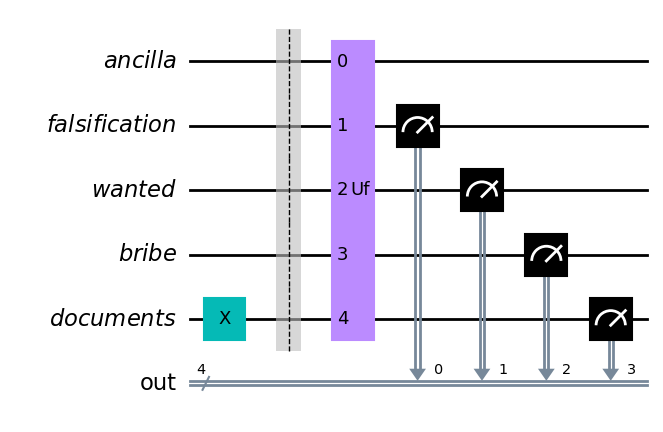

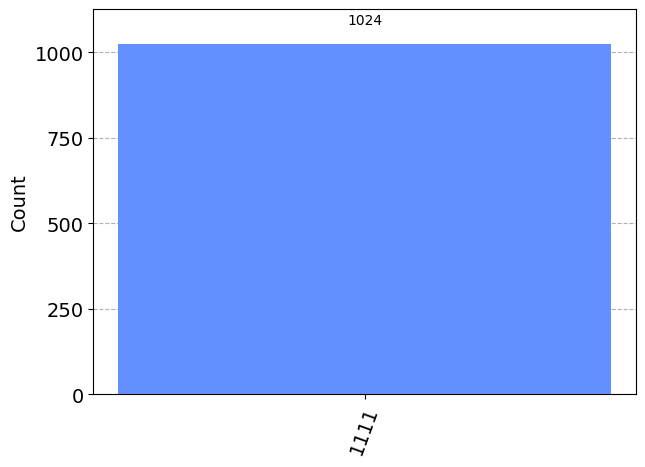

In [98]:
algorithm = QPP(false_info, wanted, bribe, all_documents)
algorithm.add_input("1000")
algorithm.prepare([all_documents])
algorithm.show()
algorithm.measure()

In [4]:
all_documents = QuantumRegister(1, name="documents")
false_info = QuantumRegister(1, name="falsification")
wanted = QuantumRegister(1, name="wanted")
bribe = QuantumRegister(1, name="bribe")

In [87]:
ancilla_phase = AncillaRegister(1, name="phase")

In [42]:
output = ClassicalRegister(4, name="out")

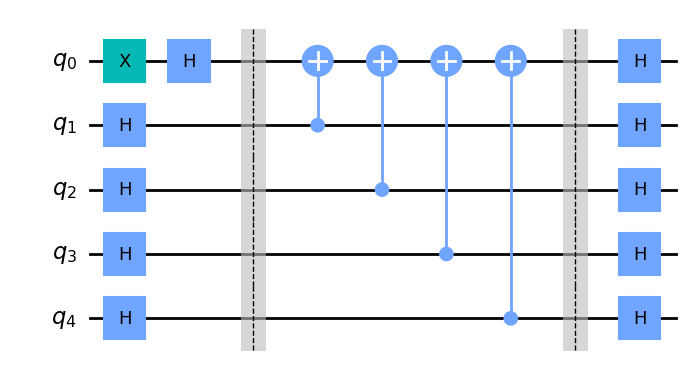

In [93]:
total_qubits = 5
oracle = QuantumCircuit(total_qubits, name="Uf")

oracle.x(0)
oracle.h(range(total_qubits))

oracle.barrier()

for i in range(1, total_qubits):
    oracle.cx(i, 0)

oracle.barrier()
    
oracle.h(range(total_qubits))
    
oracle.draw("mpl")

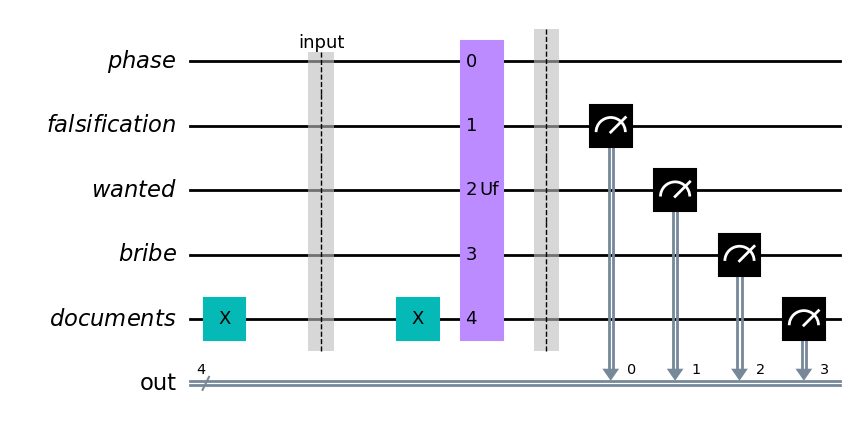

In [103]:
qc = QuantumCircuit(ancilla_phase, false_info, wanted, bribe, all_documents, output)

#qc.x(wanted)
#qc.x(bribe)
#qc.x(false_info)
qc.x(all_documents)

qc.barrier(label="input")

qc.x(all_documents)
qc.append(oracle, qc.qregs)
    
qc.barrier()

for out, register in enumerate(qregisters):
    qc.measure(register, out)


qc.draw("mpl")

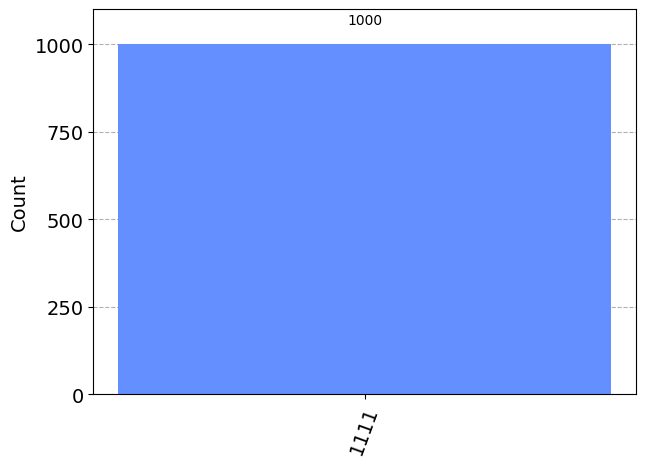

In [102]:
sim = Aer.get_backend("aer_simulator")
result = sim.run(transpile(qc, sim), shots=1000).result().get_counts()
plot_histogram(result)